In [1]:
import numpy as np
from scipy.stats import norm

# --- Black-Scholes Formula for Call Option ---
def bs_call_price(S, K, T, r, sigma):
    """Compute Black-Scholes Call Option price."""
    if sigma <= 0 or T <= 0:
        return max(0.0, S - K * np.exp(-r * T))
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


# --- Implied Volatility via Binary Search ---
def implied_volatility(C_market, S, K, T, r, tol=1e-6, max_iter=100):
    """Find implied volatility via binary search."""
    low, high = 1e-5, 5.0
    for i in range(max_iter):
        mid = 0.5 * (low + high)
        C_model = bs_call_price(S, K, T, r, mid)
        diff = C_model - C_market

        if abs(diff) < tol:
            return mid
        if diff > 0:   # Model price too high -> volatility too high
            high = mid
        else:           # Model price too low -> volatility too low
            low = mid

    return mid  # Return best estimate after max_iter


# --- Example Use Case ---
if __name__ == "__main__":
    S = 100      # Spot price
    K = 105      # Strike
    T = 0.5      # 6 months to expiry
    r = 0.02     # 2% risk-free rate
    C_market = 4.75  # Observed market price

    iv = implied_volatility(C_market, S, K, T, r)
    print(f"Implied Volatility: {iv:.4f}")


Implied Volatility: 0.2275


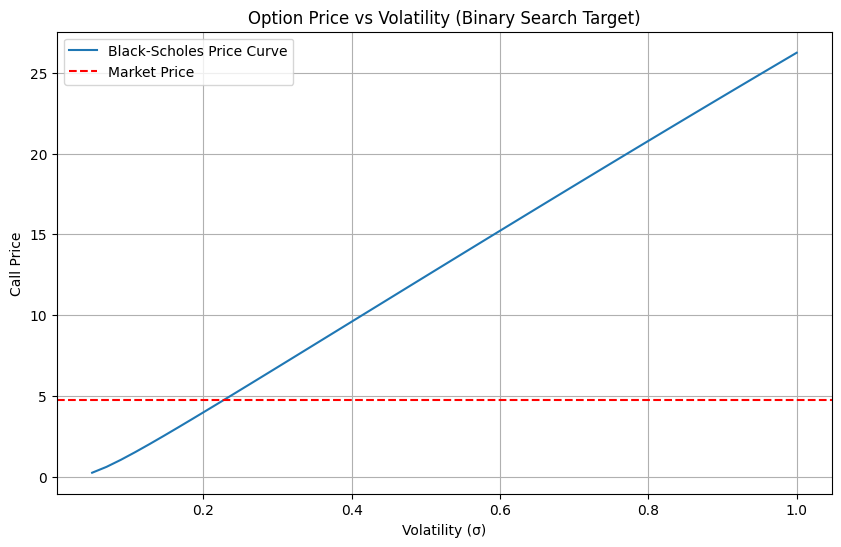

In [2]:
import matplotlib.pyplot as plt

sigmas = np.linspace(0.05, 1.0, 50)
prices = [bs_call_price(S, K, T, r, s) for s in sigmas]

plt.figure(figsize=(10, 6))
plt.plot(sigmas, prices, label="Black-Scholes Price Curve")
plt.axhline(C_market, color="r", linestyle="--", label="Market Price")
plt.xlabel("Volatility (σ)")
plt.ylabel("Call Price")
plt.title("Option Price vs Volatility (Binary Search Target)")
plt.legend(); plt.grid(True); plt.show()
